# Statistical analysis on parameters regarding Little_Shark v1.0 on Binance
## Q1: Strategy Verification: How long does the integration feature last?
### Let's say if a certain pair has an estimated return >0 for the 499 intervals, would it be profitable for the next 100/100-200/200-300/300-400/400-499 intervals?

#### Step 1: get all the tradable symbols from binance

In [117]:
"""Process of getting target trading symbols"""
from config_logger import logger
from experiment_func_get_traget_symbols import get_tradeable_symbols_dynamic
import json


# STEP 1: Get all the tradable symbols
logger.info("Getting tradable symbols from Binance.")
tradeable_symbols = get_tradeable_symbols_dynamic()
    
tradeable_symbols

2023-07-13 18:18:24,220 - Rovers_3.0 - INFO - Getting tradable symbols from Binance.
2023-07-13 18:18:43,084 - Rovers_3.0 - INFO - 48 pairs found


['BTCUSDT',
 'ETHUSDT',
 'BCHUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'LTCUSDT',
 'ETCUSDT',
 'LINKUSDT',
 'ADAUSDT',
 'BNBUSDT',
 'ATOMUSDT',
 'ONTUSDT',
 'COMPUSDT',
 'DOGEUSDT',
 'KAVAUSDT',
 'WAVESUSDT',
 'MKRUSDT',
 'DOTUSDT',
 'CRVUSDT',
 'SOLUSDT',
 'STORJUSDT',
 'AVAXUSDT',
 'FTMUSDT',
 'TOMOUSDT',
 'NEARUSDT',
 'AAVEUSDT',
 'FILUSDT',
 'MATICUSDT',
 'OCEANUSDT',
 'BELUSDT',
 'AXSUSDT',
 '1INCHUSDT',
 'SANDUSDT',
 'XEMUSDT',
 'LINAUSDT',
 'MTLUSDT',
 '1000SHIBUSDT',
 'MASKUSDT',
 'DYDXUSDT',
 '1000XECUSDT',
 'GALAUSDT',
 'CTSIUSDT',
 'GMTUSDT',
 'APEUSDT',
 'OPUSDT',
 'INJUSDT',
 'LDOUSDT',
 'APTUSDT']

#### Step 2: derive all the prices from binance for 1000 intervals

In [118]:
# Get prices and store in DataFrame
from binance_market_observer import binance_get_recent_close_price
import pandas as pd

interval = "15m"
num_interval_limit = 1000

counts = 0
price_history_dict = {}
for sym in tradeable_symbols:
    price_history = binance_get_recent_close_price(sym, interval=interval, limit=num_interval_limit)
    if len(price_history) == num_interval_limit: # make sure that each symbol has the same amount of data
        price_history_dict[sym] = price_history
        counts += 1
logger.info (f"{counts} items stored, {len(tradeable_symbols)-counts}items not stored")

# Output prices to JSON
if len(price_history_dict) > 0:
    filename = f"experiment_price_list.json"
    with open(filename, "w") as fp:
        json.dump(price_history_dict, fp, indent=4)
    logger.info("Prices saved successfully.")

price_history_pandas = pd.DataFrame(price_history_dict)
price_history_pandas

2023-07-13 18:18:51,793 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:18:51,834 - Rovers_3.0 - INFO - Prices saved successfully.


,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,ETCUSDT,LINKUSDT,ADAUSDT,BNBUSDT,...,DYDXUSDT,1000XECUSDT,GALAUSDT,CTSIUSDT,GMTUSDT,APEUSDT,OPUSDT,INJUSDT,LDOUSDT,APTUSDT
0,30598.4,1935.04,294.59,0.4814,0.756,112.05,20.198,6.479,0.2906,246.04,...,2.114,0.03592,0.02500,0.1545,0.2269,2.177,1.3276,8.668,2.1081,7.332
1,30630.7,1934.78,294.43,0.4821,0.754,112.79,20.263,6.476,0.2908,246.47,...,2.112,0.03601,0.02504,0.1543,0.2270,2.173,1.3272,8.651,2.0884,7.337
2,30649.0,1938.19,295.85,0.4831,0.758,113.33,20.320,6.499,0.2914,246.98,...,2.126,0.03579,0.02529,0.1552,0.2285,2.182,1.3383,8.694,2.1108,7.390
3,30684.9,1941.43,297.79,0.4819,0.759,114.43,20.390,6.529,0.2924,246.96,...,2.130,0.03584,0.02528,0.1568,0.2288,2.187,1.3397,8.752,2.1060,7.386
4,30692.4,1947.90,299.57,0.4817,0.760,113.78,20.518,6.553,0.2915,247.50,...,2.134,0.03642,0.02530,0.1585,0.2294,2.189,1.3400,8.777,2.1171,7.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30472.7,1876.01,284.30,0.4713,0.723,101.31,19.005,6.357,0.2869,245.59,...,1.864,0.03306,0.02420,0.1582,0.2275,1.866,1.2429,7.983,1.8996,7.015
996,30580.0,1882.95,285.31,0.4716,0.726,101.22,19.064,6.392,0.2887,245.92,...,1.870,0.03325,0.02437,0.1585,0.2279,1.875,1.2507,8.043,1.9093,7.048
997,30560.2,1882.12,284.94,0.4724,0.726,101.03,19.056,6.389,0.2886,245.84,...,1.869,0.03322,0.02434,0.1585,0.2276,1.870,1.2520,8.058,1.9167,7.052
998,30537.0,1880.98,284.97,0.4722,0.726,100.65,19.053,6.406,0.2886,245.92,...,1.874,0.03300,0.02437,0.1583,0.2280,1.868,1.2491,8.090,1.9157,7.041


#### Step 3: Check co-integrated pairs based on the 15m intervals

In [119]:
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np

# Calculate co-integration
def calculate_cointegration_static(series_1, series_2):
    """
    Calculate the cointegration between two series and return cointegration flag,
    hedge ratio, and initial intercept.

    Args:
        series_1 (np.ndarray): First series for cointegration analysis.
        series_2 (np.ndarray): Second series for cointegration analysis.

    Returns:
        tuple: A tuple containing cointegration flag, hedge ratio, and initial intercept.

    Notes:
        - The series should have the same length.
        - Cointegration tests the long-term relationship between two time series.
        - The cointegration flag indicates if the two series are cointegrated.
        - The hedge ratio represents the relationship between the two series.
        - The initial intercept is the intercept of the linear regression model.

    Raises:
        ValueError: If the input series have different lengths.

    """
    
    coint_flag = 0
    coint_res = coint(series_1, series_2)
    coint_t = coint_res[0]
    p_value = coint_res[1]
    critical_value = coint_res[2][1]
    
    
    # get initial intercept and hedge_ration of the model
    series_2 = sm.add_constant(series_2)
    model = sm.OLS(series_1, series_2).fit()
    initial_intercept = model.params[0]
    hedge_ratio = model.params[1]

    if p_value < 0.5 and coint_t < critical_value:
        coint_flag = 1
    return coint_flag, p_value, hedge_ratio, initial_intercept

In [120]:
# Calculate spread
def calculate_spread_static(series_1: list, series_2: list, hedge_ratio):
    """
    Calculates the spread between two series using a given hedge ratio.

    Args:
        series_1 (list): A list of values representing the first series.
        series_2 (list): A list of values representing the second series.
        hedge_ratio (float): The hedge ratio to be applied.

    Returns:
        list: A list containing the calculated spread.
    """
    
    spread = pd.Series(series_1) - (pd.Series(series_2) * hedge_ratio)
    return spread.tolist()

In [121]:
# Calculate Z-Score
def calculate_zscore_static(spread: list) -> list:
    """
    Calculates the Z-Score of a given spread.

    Args:
        spread (list): A list of values representing the spread.

    Returns:
        list: A list containing the Z-Score values.
    """
    data = np.array(spread)
    return stats.zscore(data)

In [122]:
def check_differnet_signal(a,b):
    return abs(a + b) != abs(a) + abs(b)

def calculate_trading_estimated_oppotunities_return(series_1, series_2, hedge_ratio: float, 
                                                    initial_intercept: float, threshod: float, trading_times_threshod = 5, investable_capital_each_time = 100, estimated_trading_fee_rate = 0.0004,
                                                    func_z_score = calculate_zscore_static, num_window = 0) -> int:
    enter_market_signal = False
    spread = calculate_spread_static(series_1, series_2, hedge_ratio)
    
    if num_window == 0:
        zscore_series = func_z_score(spread)
    elif num_window > 0:
        zscore_series = func_z_score(spread, num_window)
    
    trade_oppotunities = 0
    last_value = 0.01
    
    cumulative_return = 0
    cumulative_trading_qty = 0
    count_entering_time = 0
    
    open_long_price_list = []
    open_short_price_list = []
    
    for index, value in enumerate(zscore_series):
        if abs(value) >= abs(threshod) and not check_differnet_signal(value, last_value):
            enter_market_signal = True
            
            if value >= threshod:
                direction = "sell"
            elif value <= -threshod:
                direction = "buy"
            
            if count_entering_time < trading_times_threshod:
                cumulative_trading_qty += (investable_capital_each_time / (series_1[index] + hedge_ratio * series_2[index]))  # qty for symbol 1
                if direction == "buy":
                    open_long_price_list.append(series_1[index])
                    open_short_price_list.append(series_2[index])
                elif direction == "sell":
                    open_short_price_list.append(series_1[index])
                    open_long_price_list.append(series_2[index])
                    
                count_entering_time += 1
                
        elif enter_market_signal and check_differnet_signal(value, last_value):
            trade_oppotunities += 1
            
            # calculate the exiting_revenue of the symbols
            if direction == "buy":
                buy_side_profit = (series_1[index] - sum(open_long_price_list)/len(open_long_price_list)) * cumulative_trading_qty
                sell_side_profit = (sum(open_short_price_list)/len(open_short_price_list) - series_2[index]) * cumulative_trading_qty * hedge_ratio 
            elif direction == "sell":
                buy_side_profit = (series_2[index] - sum(open_long_price_list)/len(open_long_price_list)) * cumulative_trading_qty * hedge_ratio
                sell_side_profit = (sum(open_short_price_list)/len(open_short_price_list) - series_1[index]) * cumulative_trading_qty
                
            exiting_profit = buy_side_profit + sell_side_profit - investable_capital_each_time * count_entering_time * estimated_trading_fee_rate # revenue for all symbols

            
            # Cumulate the return
            cumulative_return += exiting_profit
            
            # Reset
            enter_market_signal = False
            cumulative_trading_qty = 0
            count_entering_time = 0
            direction = ""
            open_long_price_list = []
            open_short_price_list = []
            
        last_value = value

        
    return trade_oppotunities, cumulative_return

In [123]:
def get_cointegrated_pairs_experiment(prices, num_wave=0, trigger_z_score_threshod = 1.0) -> str:
    # Loop through coins and check for co-integration
    coint_pair_list = []

    loop_count = 0
    for sym_1 in tradeable_symbols:
        loop_count += 1
        # Check each coin against the first (sym_1)
        for sym_2 in tradeable_symbols[loop_count:]:
            
            # Get close prices
            series_1 = price_history_dict[sym_1][:498]
            series_2 = price_history_dict[sym_2][:498]

            # Check for cointegration and add cointegrated pair
            coint_flag, p_value, hedge_ratio, initial_intercept = calculate_cointegration_static(series_1, series_2)
            
            trading_oppotunities_first_499intervals, estimated_return_first_499intervals = calculate_trading_estimated_oppotunities_return(series_1, series_2, hedge_ratio, initial_intercept, trigger_z_score_threshod)
            if coint_flag == 1:
                time_period_list = [100, 200, 300, 400, 499]
                trading_oppotunities_list = []
                estimated_return_list = []
                for time_period in time_period_list:
                    
                    series_1_after = price_history_dict[sym_1][499 + time_period - 100:(499 + time_period)]
                    series_2_after = price_history_dict[sym_2][499 + time_period - 100:(499 + time_period)]
                    
                    coint_flag, p_value, hedge_ratio_new, initial_intercept = calculate_cointegration_static(series_1_after, series_2_after)
                    
                    trading_oppotunities, estimated_return = calculate_trading_estimated_oppotunities_return(series_1_after, series_2_after, hedge_ratio_new, initial_intercept, trigger_z_score_threshod)
                    
                    trading_oppotunities_list.append(trading_oppotunities)
                    estimated_return_list.append(estimated_return)
                
                coint_pair_list.append({
                    "sym_1": sym_1,
                    "sym_2": sym_2,
                    "hedge_ratio": hedge_ratio,
                    "initial_intercept": initial_intercept,
                    "trading_oppotunities_first_499intervals": trading_oppotunities_first_499intervals,
                    "estimated_return_first_499intervals": estimated_return_first_499intervals,
                    "estimated_return_next_100intervals": estimated_return_list[0],
                    "estimated_return_next_100-200intervals": estimated_return_list[1],
                    "estimated_return_next_200-300intervals": estimated_return_list[2],
                    "estimated_return_next_300-400intervals": estimated_return_list[3],
                    "estimated_return_next_400-500intervals": estimated_return_list[4],
                })

    # Output results and rank all the trading pairs
    df_coint = pd.DataFrame(coint_pair_list)
    # add the total score column
    df_coint["total_score"] = df_coint["estimated_return_first_499intervals"]
    df_coint = df_coint.sort_values("estimated_return_first_499intervals", ascending=False)
    filename = f"experiment_15mintervals_different_period_cointegrated_pairs.csv"
    df_coint.to_csv(filename)
    
    return df_coint

In [124]:
df_coint = get_cointegrated_pairs_experiment(price_history_dict, 0, 0.8)

df_coint

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,estimated_return_next_100-200intervals,estimated_return_next_200-300intervals,estimated_return_next_300-400intervals,estimated_return_next_400-500intervals,total_score
159,SOLUSDT,FILUSDT,-3.452513,-0.216917,4,375.599741,12.586011,10.906195,0.874228,8.346415,2.222701,375.599741
123,MKRUSDT,TOMOUSDT,-291.872802,594.625786,7,206.675964,59.103970,14.918758,17.818261,13.744265,11.464367,206.675964
119,MKRUSDT,SOLUSDT,-5.659836,256.190031,7,176.804172,27.458873,49.393113,8.548771,12.260238,11.249161,176.804172
117,MKRUSDT,DOTUSDT,-38.574163,138.384316,6,170.074034,11.980199,18.189754,14.984258,16.815699,8.457382,170.074034
129,MKRUSDT,BELUSDT,-103.367700,1246.244707,7,168.608547,27.407305,21.286304,9.762460,15.849774,39.466319,168.608547
...,...,...,...,...,...,...,...,...,...,...,...,...
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,2.521224,4.430413,4.580677,6.531783,8.086564
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,3.959242,2.613339,4.701214,2.761619,7.874282
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,2.648056,3.260840,3.373229,4.425970,7.082322
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,0.928699,4.327830,2.964963,2.450601,6.318597


Let's summarize the result so that we can better analyse it.

In [125]:
num_overall = df_coint.shape[0]
profitable_first499 = df_coint[df_coint["estimated_return_first_499intervals"] > 0]
num_profitable_first499 = profitable_first499.count()[0]

profitable_499_599 = profitable_first499[profitable_first499["estimated_return_next_100intervals"] > 0]
num_profitable_499_599 = profitable_499_599.count()[0]

profitable_599_699 = profitable_499_599[profitable_499_599["estimated_return_next_100-200intervals"] > 0]
num_profitable_599_699 = profitable_599_699.count()[0]

profitable_699_799 = profitable_599_699[profitable_599_699["estimated_return_next_200-300intervals"] > 0]
num_profitable_699_799 = profitable_699_799.count()[0]

profitable_799_899 = profitable_699_799[profitable_699_799["estimated_return_next_300-400intervals"] > 0]
num_profitable_799_899 = profitable_799_899.count()[0]

profitable_899_999 = profitable_799_899[profitable_799_899["estimated_return_next_400-500intervals"] > 0]
num_profitable_899_999 = profitable_899_999.count()[0]

print(f"overall number is {num_overall}, among them, {num_profitable_first499} pairs have positive return, with the ratio of {round(num_profitable_first499/num_overall * 100, 2)}%")
num_profitable_list = [num_profitable_499_599, num_profitable_599_699, num_profitable_699_799, num_profitable_799_899, num_profitable_899_999]
for i in range(5):
    print(f"For all pairs that meet the condition above, {num_profitable_list[i]} pairs have positive return in the next 100 intervals, with the ratio of {round(num_profitable_list[i]/num_overall * 100, 2)}%")

overall number is 199, among them, 199 pairs have positive return, with the ratio of 100.0%
For all pairs that meet the condition above, 170 pairs have positive return in the next 100 intervals, with the ratio of 85.43%
For all pairs that meet the condition above, 159 pairs have positive return in the next 100 intervals, with the ratio of 79.9%
For all pairs that meet the condition above, 152 pairs have positive return in the next 100 intervals, with the ratio of 76.38%
For all pairs that meet the condition above, 127 pairs have positive return in the next 100 intervals, with the ratio of 63.82%
For all pairs that meet the condition above, 109 pairs have positive return in the next 100 intervals, with the ratio of 54.77%


### Summary
Now we can draw some interesting observations from the results above:

- It's quite intuitive that with the time passing by, the profitable pairs are no longer profitable. But luckily, we can still have a sweet spot of win rate for the next 100 15m intervals, whcih is a quite optimistic result compared to my hypothesis.

- for the trading period, the next 100 - 200 intervals has a win rate lower than 50%, which indicates that it is not a good choice for getting stable return compared to the next 0-100 intervals. Therefore, next 0-100 intervals should be the trading period that I'm focusing on.

# Answer to Q1: Yes, the cointegration feature would last for the next 100 intervals with the win rate over 100% under current circumstances.

### Next step
- I want to play around with the trading oppotunities and estimated return in the first 499 intervals, to see if I can find some interesting relations of these two parameter with the win rate.

- Next I want to check the ways of calculating the z-score, such as by adding a scrolling window so that the calculation of z-score should not be static, to see if I can make the return looks much better.

- Finally, I should try other intervals like 30m, 10m, 60m, 90m, 120m, to see which one can bring me a better return by comparing them.

# Q2: Trading oppotunities, estimated returns in the past, or anything else.....? What should be the best signal to judge on?
### Should I use z-score window to calculate dynamic z-score instead of the static one?
### 

### Step 1: Optimize the selection of pairs by filtering the trading oppotunities in the first 499 intervals.

In [126]:
# Discover the relationship of trading oppotunities and winrate
# df_coint.nlargest(50, "trading_oppotunities_first_499intervals")
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    top_oppotunities_positive_return_first499 = profitable_first499.nlargest(i, "trading_oppotunities_first_499intervals")
    top_oppotunities_next100_positive_return = top_oppotunities_positive_return_first499[top_oppotunities_positive_return_first499["estimated_return_next_100intervals"] > 0]
    num_top_oppotunities_next100_positive_return = top_oppotunities_next100_positive_return.count()[0]
    print(f"For the pairs with the top {i} number of trading oppotunities, the win rate for next 100 intervals is {round((num_top_oppotunities_next100_positive_return / i) * 100, 2)}")


For the pairs with the top 10 number of trading oppotunities, the win rate for next 100 intervals is 100.0
For the pairs with the top 20 number of trading oppotunities, the win rate for next 100 intervals is 100.0
For the pairs with the top 30 number of trading oppotunities, the win rate for next 100 intervals is 96.67
For the pairs with the top 40 number of trading oppotunities, the win rate for next 100 intervals is 97.5
For the pairs with the top 50 number of trading oppotunities, the win rate for next 100 intervals is 90.0
For the pairs with the top 60 number of trading oppotunities, the win rate for next 100 intervals is 90.0
For the pairs with the top 70 number of trading oppotunities, the win rate for next 100 intervals is 91.43
For the pairs with the top 80 number of trading oppotunities, the win rate for next 100 intervals is 91.25
For the pairs with the top 90 number of trading oppotunities, the win rate for next 100 intervals is 87.78
For the pairs with the top 100 number of

### Summary for trading oppotunities
- From the results above, it is noted that the win rate has a descending trend when the number of top trading oppotunities are in [10, 60], but the trend becomes ambiguious after the number reach 60.

### Conclusion
- We can draw a conclusion that we can get a better win rate when we choose a trading pair with the higher number of trading oppotunities.

### Step 2: Discover the relationship between win rate and estimated return

In [127]:
# Discover the relationship between win rate and estimated return
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    top_return_positive_return_first499 = profitable_first499.nlargest(i, "estimated_return_first_499intervals")
    top_return_next100_positive_return = top_return_positive_return_first499[top_return_positive_return_first499["estimated_return_next_100intervals"] > 0]
    num_top_return_next100_positive_return = top_return_next100_positive_return.count()[0]
    print(f"For the pairs with the top {i} returns, the win rate for next 100 intervals is {round((num_top_return_next100_positive_return / i) * 100, 2)}")

profitable_first499.nlargest(10, "estimated_return_first_499intervals")

For the pairs with the top 10 returns, the win rate for next 100 intervals is 100.0
For the pairs with the top 20 returns, the win rate for next 100 intervals is 95.0
For the pairs with the top 30 returns, the win rate for next 100 intervals is 96.67
For the pairs with the top 40 returns, the win rate for next 100 intervals is 90.0
For the pairs with the top 50 returns, the win rate for next 100 intervals is 90.0
For the pairs with the top 60 returns, the win rate for next 100 intervals is 86.67
For the pairs with the top 70 returns, the win rate for next 100 intervals is 85.71
For the pairs with the top 80 returns, the win rate for next 100 intervals is 86.25
For the pairs with the top 90 returns, the win rate for next 100 intervals is 87.78
For the pairs with the top 100 returns, the win rate for next 100 intervals is 89.0


,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,estimated_return_next_100-200intervals,estimated_return_next_200-300intervals,estimated_return_next_300-400intervals,estimated_return_next_400-500intervals,total_score
159,SOLUSDT,FILUSDT,-3.452513,-0.216917,4,375.599741,12.586011,10.906195,0.874228,8.346415,2.222701,375.599741
123,MKRUSDT,TOMOUSDT,-291.872802,594.625786,7,206.675964,59.103970,14.918758,17.818261,13.744265,11.464367,206.675964
119,MKRUSDT,SOLUSDT,-5.659836,256.190031,7,176.804172,27.458873,49.393113,8.548771,12.260238,11.249161,176.804172
117,MKRUSDT,DOTUSDT,-38.574163,138.384316,6,170.074034,11.980199,18.189754,14.984258,16.815699,8.457382,170.074034
129,MKRUSDT,BELUSDT,-103.367700,1246.244707,7,168.608547,27.407305,21.286304,9.762460,15.849774,39.466319,168.608547
124,MKRUSDT,NEARUSDT,-161.856985,90.918894,5,163.144858,170.930009,17.426088,18.390366,16.825591,7.917054,163.144858
139,MKRUSDT,1000XECUSDT,-2103.747308,172.110150,7,161.755538,12.531916,24.219455,15.913832,16.522068,11.822607,161.755538
121,MKRUSDT,AVAXUSDT,-11.915466,248.426605,6,160.681145,63.715424,18.970711,15.149917,8.552345,11.828695,160.681145
128,MKRUSDT,OCEANUSDT,-406.136179,1154.871193,6,160.545735,22.350880,-5909.433196,8.140890,17.116352,26.290974,160.545735
131,MKRUSDT,1INCHUSDT,-95.609652,431.062467,7,159.859351,23.192507,12.689009,12.389101,20.525958,13.482995,159.859351


### Summary
- From the result above, we can see that for the best trading pairs with the most returns in the first 499 intervals, their performance for the next 100 intervals can not be guaranteed.

- But for the top 80 - 100 returns, we can observe a clear descending value for the win rate, which means that we should not select the trading pair with a bad performance in the trainning period.


    - How about picking the trading pairs that perform the worst. Would they perform well in the next several intervals?
    - How about change the number of intervals to choose my trading pairs, instead of 499, let's say 200, 250, 300, 350, 400, 450?

In [128]:
# Discover the relationship between win rate and estimated return
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    least_return_positive_return_first499 = df_coint.nsmallest(i, "estimated_return_first_499intervals")
    least_return_next100_positive_return = least_return_positive_return_first499[least_return_positive_return_first499["estimated_return_next_100intervals"] > 0]
    num_least_return_next100_positive_return = least_return_next100_positive_return.count()[0]
    print(f"For the pairs with the least {i} returns, the win rate for next 100 intervals is {round((num_least_return_next100_positive_return / i) * 100, 2)}")
    
df_coint.nsmallest(10, "estimated_return_first_499intervals")

For the pairs with the least 10 returns, the win rate for next 100 intervals is 60.0
For the pairs with the least 20 returns, the win rate for next 100 intervals is 80.0
For the pairs with the least 30 returns, the win rate for next 100 intervals is 73.33
For the pairs with the least 40 returns, the win rate for next 100 intervals is 77.5
For the pairs with the least 50 returns, the win rate for next 100 intervals is 74.0
For the pairs with the least 60 returns, the win rate for next 100 intervals is 76.67
For the pairs with the least 70 returns, the win rate for next 100 intervals is 77.14
For the pairs with the least 80 returns, the win rate for next 100 intervals is 78.75
For the pairs with the least 90 returns, the win rate for next 100 intervals is 80.0
For the pairs with the least 100 returns, the win rate for next 100 intervals is 82.0


,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,estimated_return_next_100-200intervals,estimated_return_next_200-300intervals,estimated_return_next_300-400intervals,estimated_return_next_400-500intervals,total_score
0,BTCUSDT,BNBUSDT,57.324969,9266.725837,2,5.427790,0.000000,0.654596,6.870554,1.042578,2.097030,5.427790
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,0.928699,4.327830,2.964963,2.450601,6.318597
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,2.648056,3.260840,3.373229,4.425970,7.082322
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,3.959242,2.613339,4.701214,2.761619,7.874282
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,2.521224,4.430413,4.580677,6.531783,8.086564
2,BTCUSDT,FTMUSDT,14323.761871,20144.834508,3,8.382225,2.526034,1.777948,3.992116,1.235958,2.526139,8.382225
4,BTCUSDT,1INCHUSDT,26740.338847,23754.819406,5,8.873529,0.208701,2.004069,5.930283,2.927365,2.582076,8.873529
58,ADAUSDT,ONTUSDT,0.882912,0.184821,4,9.022522,18.136795,12.117255,6.389325,0.000000,3.449627,9.022522
67,BNBUSDT,COMPUSDT,1.285563,254.892575,3,9.506940,4.097387,5.383707,6.157092,5.498789,7.721973,9.506940
24,EOSUSDT,DOTUSDT,0.118067,0.068125,3,9.976734,0.000000,0.874922,3.736300,3.028778,4.415715,9.976734


In [129]:
# Discover the relationship between win rate and estimated return
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    least_return_positive_return_first499 = profitable_first499.nsmallest(i, "estimated_return_first_499intervals")
    least_return_next100_positive_return = least_return_positive_return_first499[least_return_positive_return_first499["estimated_return_next_100intervals"] > 0]
    num_least_return_next100_positive_return = least_return_next100_positive_return.count()[0]
    print(f"For the pairs with the least {i} returns, the win rate for next 100 intervals is {round((num_least_return_next100_positive_return / i) * 100, 2)}")
profitable_first499.nsmallest(10, "estimated_return_first_499intervals")

For the pairs with the least 10 returns, the win rate for next 100 intervals is 60.0
For the pairs with the least 20 returns, the win rate for next 100 intervals is 80.0
For the pairs with the least 30 returns, the win rate for next 100 intervals is 73.33
For the pairs with the least 40 returns, the win rate for next 100 intervals is 77.5
For the pairs with the least 50 returns, the win rate for next 100 intervals is 74.0
For the pairs with the least 60 returns, the win rate for next 100 intervals is 76.67
For the pairs with the least 70 returns, the win rate for next 100 intervals is 77.14
For the pairs with the least 80 returns, the win rate for next 100 intervals is 78.75
For the pairs with the least 90 returns, the win rate for next 100 intervals is 80.0
For the pairs with the least 100 returns, the win rate for next 100 intervals is 82.0


,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,estimated_return_next_100-200intervals,estimated_return_next_200-300intervals,estimated_return_next_300-400intervals,estimated_return_next_400-500intervals,total_score
0,BTCUSDT,BNBUSDT,57.324969,9266.725837,2,5.427790,0.000000,0.654596,6.870554,1.042578,2.097030,5.427790
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,0.928699,4.327830,2.964963,2.450601,6.318597
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,2.648056,3.260840,3.373229,4.425970,7.082322
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,3.959242,2.613339,4.701214,2.761619,7.874282
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,2.521224,4.430413,4.580677,6.531783,8.086564
2,BTCUSDT,FTMUSDT,14323.761871,20144.834508,3,8.382225,2.526034,1.777948,3.992116,1.235958,2.526139,8.382225
4,BTCUSDT,1INCHUSDT,26740.338847,23754.819406,5,8.873529,0.208701,2.004069,5.930283,2.927365,2.582076,8.873529
58,ADAUSDT,ONTUSDT,0.882912,0.184821,4,9.022522,18.136795,12.117255,6.389325,0.000000,3.449627,9.022522
67,BNBUSDT,COMPUSDT,1.285563,254.892575,3,9.506940,4.097387,5.383707,6.157092,5.498789,7.721973,9.506940
24,EOSUSDT,DOTUSDT,0.118067,0.068125,3,9.976734,0.000000,0.874922,3.736300,3.028778,4.415715,9.976734


### Summary on least return trading pairs for the first 499 intervals
- From the results above, there is no clue for a relationship to be shown.

- **But I don't think this is a good trading signal to choose trading pair, as you can see, even when they can earn money in the following terms. The profits of them are not attractive.**

# Answer to Q2: 
#### 1. The more trading oppotunities, the better
#### 2. The trading pair with bad performance on estimated return in the trainning period should not be selected
#### 3. Use the investable_value/(price_1 + price_2 * hedge_ratio) to denote the total revenue

# Q3: How should I calculate z-score?

In [130]:
# Encapsulate the process

# Calculate Z-Score
def calculate_zscore_window(spread: list, window) -> list:
    """
    Calculates the Z-Score of a given spread.

    Args:
        spread (list): A list of values representing the spread.

    Returns:
        list: A list containing the Z-Score values.
    """
    data = pd.DataFrame(spread)
    rolling = data.rolling(window=window)
    m = rolling.mean()
    s = rolling.std()
    z_score = (data - m) / s
    z_score[0][:(window-1)] = 0
    return z_score[0].tolist()

#
test_price = price_history_dict["BTCUSDT"][:30]
calculate_zscore_window(test_price, 21)


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4835116336778117,
 -1.0725909034069459,
 -1.642438143356701,
 -1.809521857751426,
 -1.2028505898850408,
 -1.3794925512798768,
 -1.3726259275855528,
 0.10416827635291769,
 0.4794769702732772,
 -0.7846833340233743]

In [131]:
experiment_different_z_score_calculation = profitable_first499[["sym_1", "sym_2", "hedge_ratio","initial_intercept","trading_oppotunities_first_499intervals", "estimated_return_first_499intervals", "estimated_return_next_100intervals"]].copy()
windows = [15, 21, 26, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200]
for window in windows:
    
    
    estimated_return_list = []
    estimated_oppotunities_list = []
    
    for i in range(df_coint.shape[0]):
        symbol_1 = experiment_different_z_score_calculation["sym_1"][i]
        symbol_2 = experiment_different_z_score_calculation["sym_2"][i]
        
        symbol_1_series = price_history_dict[symbol_1][499 - window: 599 - window]
        symbol_2_series = price_history_dict[symbol_2][499 - window: 599 - window]
        
        hedge_ratio_new = experiment_different_z_score_calculation["hedge_ratio"][i]
        initial_intercept = experiment_different_z_score_calculation["initial_intercept"][i]
        
        trading_oppotunities, estimated_return = calculate_trading_estimated_oppotunities_return(symbol_1_series, symbol_2_series, hedge_ratio_new ,initial_intercept,
                                                                                                 0.8, func_z_score=calculate_zscore_window, num_window=window)
        estimated_return_list.append(estimated_return)
        estimated_oppotunities_list.append(trading_oppotunities)
        
    experiment_different_z_score_calculation[f"window_{window}_estimated_return"] = estimated_return_list
    experiment_different_z_score_calculation[f"window_{window}_trading_oppotunities"] = estimated_oppotunities_list
        

experiment_different_z_score_calculation

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,window_15_estimated_return,window_15_trading_oppotunities,window_21_estimated_return,...,window_80_estimated_return,window_80_trading_oppotunities,window_90_estimated_return,window_90_trading_oppotunities,window_100_estimated_return,window_100_trading_oppotunities,window_150_estimated_return,window_150_trading_oppotunities,window_200_estimated_return,window_200_trading_oppotunities
159,SOLUSDT,FILUSDT,-3.452513,-0.216917,4,375.599741,12.586011,0.317527,3,0.257303,...,0.0,0,0.0,0,0,0,0,0,0,0
123,MKRUSDT,TOMOUSDT,-291.872802,594.625786,7,206.675964,59.103970,-1.412061,2,-2.164424,...,0.0,0,0.0,0,0,0,0,0,0,0
119,MKRUSDT,SOLUSDT,-5.659836,256.190031,7,176.804172,27.458873,-0.354422,3,0.160851,...,0.0,0,0.0,0,0,0,0,0,0,0
117,MKRUSDT,DOTUSDT,-38.574163,138.384316,6,170.074034,11.980199,0.169696,6,-0.597540,...,0.0,0,0.0,0,0,0,0,0,0,0
129,MKRUSDT,BELUSDT,-103.367700,1246.244707,7,168.608547,27.407305,-0.390214,2,-0.033794,...,0.0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,3.751060,5,1.987335,...,0.0,0,0.0,0,0,0,0,0,0,0
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,1.997988,3,1.961977,...,0.0,0,0.0,0,0,0,0,0,0,0
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,3.384317,4,5.423323,...,0.0,0,0.0,0,0,0,0,0,0,0
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,1.049309,4,1.467081,...,0.0,0,0.0,0,0,0,0,0,0,0


In [132]:
experiment_different_z_score_calculation = profitable_first499[["sym_1", "sym_2", "hedge_ratio","initial_intercept","trading_oppotunities_first_499intervals", "estimated_return_first_499intervals", "estimated_return_next_100intervals"]].copy()
windows = [15, 21, 26, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 350, 400, 450]
for window in windows:
    
    
    estimated_return_list = []
    estimated_oppotunities_list = []
    
    for i in range(df_coint.shape[0]):
        symbol_1 = experiment_different_z_score_calculation["sym_1"][i]
        symbol_2 = experiment_different_z_score_calculation["sym_2"][i]
        
        symbol_1_series = price_history_dict[symbol_1][499 - window: 599]
        symbol_2_series = price_history_dict[symbol_2][499 - window: 599]
        
        hedge_ratio_new = experiment_different_z_score_calculation["hedge_ratio"][i]
        initial_intercept = experiment_different_z_score_calculation["initial_intercept"][i]
        
        trading_oppotunities, estimated_return = calculate_trading_estimated_oppotunities_return(symbol_1_series, symbol_2_series, hedge_ratio_new ,initial_intercept,
                                                                                                 0.8, func_z_score=calculate_zscore_window, num_window=window)
        estimated_return_list.append(estimated_return)
        estimated_oppotunities_list.append(trading_oppotunities)
        
    experiment_different_z_score_calculation[f"window_{window}_estimated_return"] = estimated_return_list
    experiment_different_z_score_calculation[f"window_{window}_trading_oppotunities"] = estimated_oppotunities_list
        

experiment_different_z_score_calculation

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,window_15_estimated_return,window_15_trading_oppotunities,window_21_estimated_return,...,window_150_estimated_return,window_150_trading_oppotunities,window_200_estimated_return,window_200_trading_oppotunities,window_350_estimated_return,window_350_trading_oppotunities,window_400_estimated_return,window_400_trading_oppotunities,window_450_estimated_return,window_450_trading_oppotunities
159,SOLUSDT,FILUSDT,-3.452513,-0.216917,4,375.599741,12.586011,-0.300010,4,-0.202045,...,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
123,MKRUSDT,TOMOUSDT,-291.872802,594.625786,7,206.675964,59.103970,-2.351713,5,-2.164424,...,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
119,MKRUSDT,SOLUSDT,-5.659836,256.190031,7,176.804172,27.458873,-0.354422,3,0.162753,...,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
117,MKRUSDT,DOTUSDT,-38.574163,138.384316,6,170.074034,11.980199,0.169696,6,-0.211642,...,0.491130,1,0.000000,0,0.000000,0,0.000000,0,0.000000,0
129,MKRUSDT,BELUSDT,-103.367700,1246.244707,7,168.608547,27.407305,-0.180441,4,0.235043,...,0.804284,2,0.000000,0,0.000000,0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,3.751060,5,3.251642,...,4.795540,2,8.745748,2,7.771523,2,5.084097,2,5.084097,2
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,1.997988,3,1.961977,...,2.049685,1,2.049685,1,0.000000,0,0.000000,0,0.000000,0
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,3.384317,4,5.423323,...,3.576881,1,6.181507,1,3.478706,1,3.089489,1,4.314722,1
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,1.049309,4,1.467081,...,4.757934,1,3.810631,1,3.810631,1,3.810631,1,3.810631,1


Now we can start to analyse it a little bit.

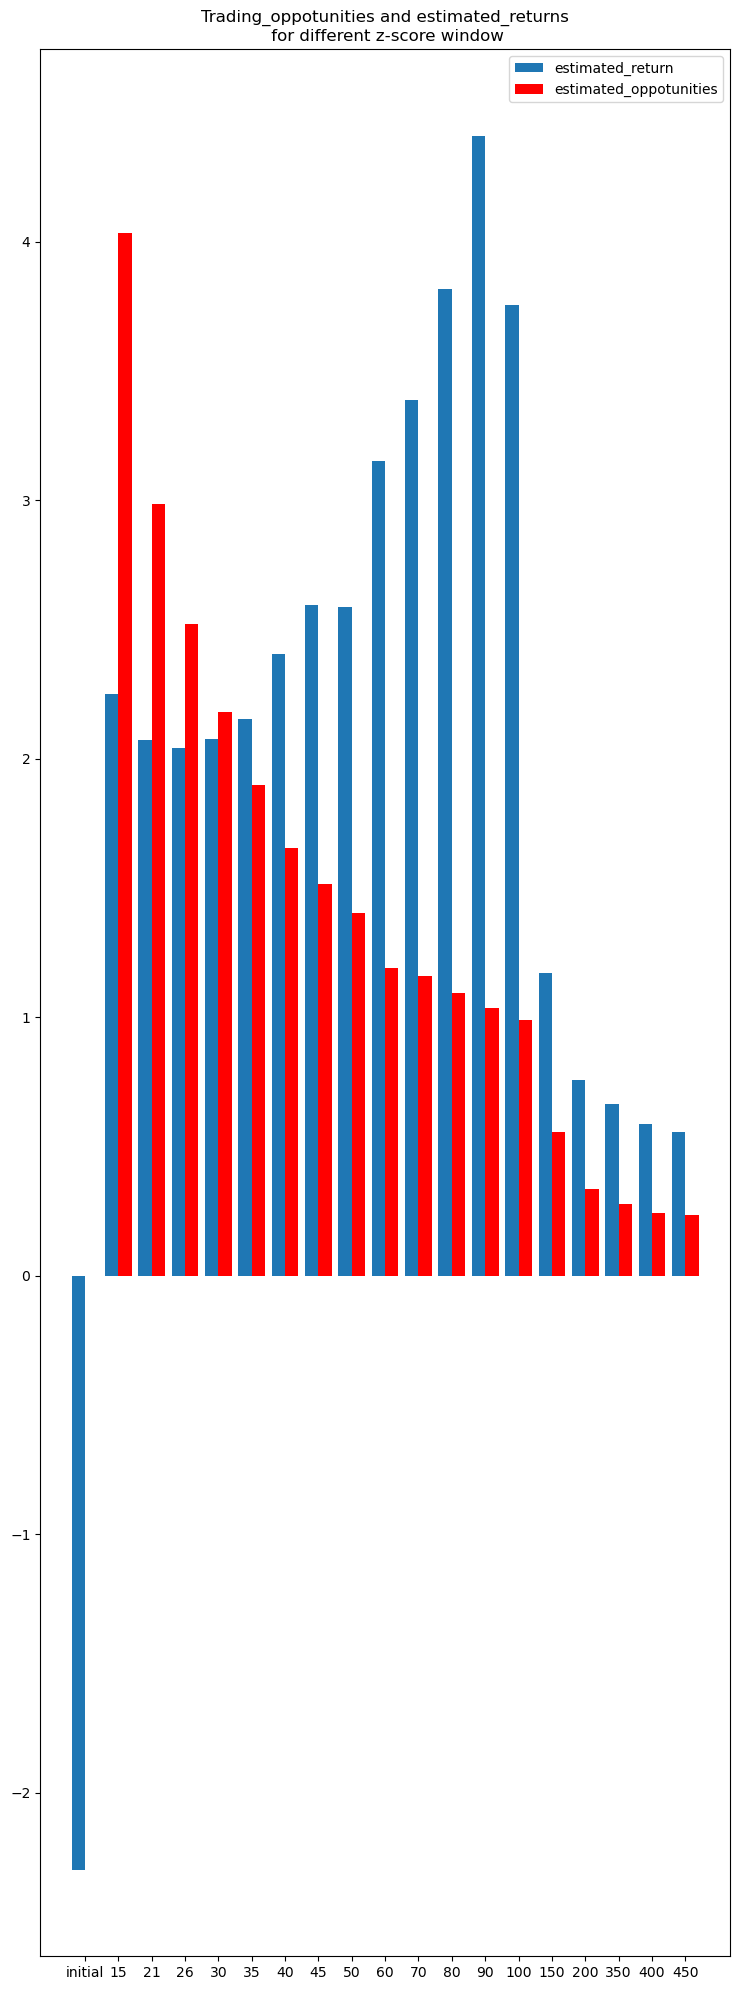

In [133]:
import matplotlib.pyplot as plt

x = ["initial"]
y1 = [experiment_different_z_score_calculation["estimated_return_next_100intervals"].mean()]
y2 = [0]



for window in windows:
    x.append(f"{window}")
    y1.append(experiment_different_z_score_calculation[f"window_{window}_estimated_return"].mean())
    y2.append(experiment_different_z_score_calculation[f"window_{window}_trading_oppotunities"].mean())

width = 0.4

position = np.arange(len(x))
fig, ax = plt.subplots()
p1 = ax.bar(position - width/2, y1, width=width, label = "estimated_return")
p2 = ax.bar(position + width/2, y2, color = "r", width=width, label = "estimated_oppotunities")
ax.set_xticks(position)
ax.set_xticklabels(x)
ax.legend(("estimated_return", "estimated_oppotunities"))
ax.set_title("Trading_oppotunities and estimated_returns\n for different z-score window")

plt.show()


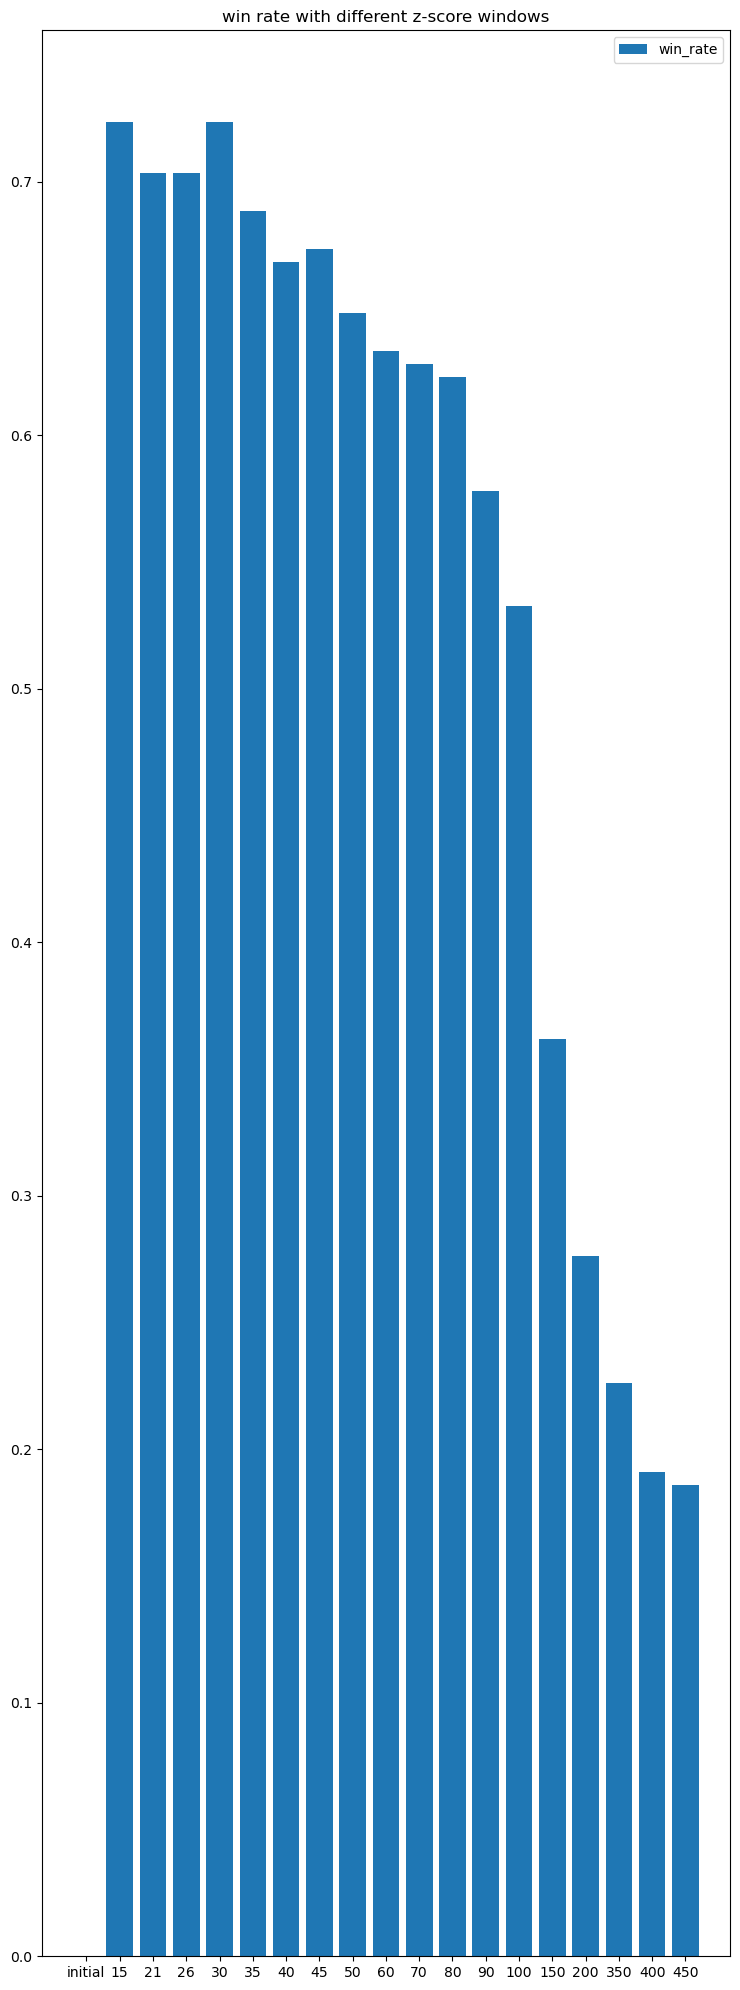

0.6733668341708543

In [134]:
y_win_rate_list = [0]
for window in windows:
    y_win_rate_list.append(experiment_different_z_score_calculation[experiment_different_z_score_calculation[f"window_{window}_estimated_return"] > 0].shape[0] / experiment_different_z_score_calculation.shape[0])

# fig, ax = plt.subplots()
# p3 = ax.bar(y_win_rate_list, width=width, label = "win_rate")

plt.bar(x, y_win_rate_list, label = "win_rate")
plt.title("win rate with different z-score windows")
plt.legend()
plt.show()

experiment_different_z_score_calculation[experiment_different_z_score_calculation[f"window_{45}_estimated_return"] > 0].shape[0] / experiment_different_z_score_calculation.shape[0]

### Summary
- Considering win rate, estimated returns and trading oppotunities, z-score window of 45 should be the best choice.

## Answer to Q3:
#### Use scrolling z-score window with the size of 45 should be the best choice. I like the number of ***46***, let's use this one. Haha

# Q4: What is the best z-score threshod?

In [135]:
experiment_different_threshod_calculation = profitable_first499[["sym_1", "sym_2", "hedge_ratio","initial_intercept","trading_oppotunities_first_499intervals", "estimated_return_first_499intervals", "estimated_return_next_100intervals"]].copy()
z_score_threshod_list = [0.01 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
for z_score_threshod in z_score_threshod_list:
    
    window = 46
    estimated_return_list = []
    estimated_oppotunities_list = []
    
    for i in range(df_coint.shape[0]):
        symbol_1 = experiment_different_threshod_calculation["sym_1"][i]
        symbol_2 = experiment_different_threshod_calculation["sym_2"][i]
        
        symbol_1_series = price_history_dict[symbol_1][499 - window: 599]
        symbol_2_series = price_history_dict[symbol_2][499 - window: 599]
        
        hedge_ratio_new = experiment_different_threshod_calculation["hedge_ratio"][i]
        initial_intercept = experiment_different_threshod_calculation["initial_intercept"][i]
        
        trading_oppotunities, estimated_return = calculate_trading_estimated_oppotunities_return(symbol_1_series, symbol_2_series, hedge_ratio_new ,initial_intercept,
                                                                                                 threshod=z_score_threshod, func_z_score=calculate_zscore_window, num_window=window)
        estimated_return_list.append(estimated_return)
        estimated_oppotunities_list.append(trading_oppotunities)
        
    experiment_different_threshod_calculation[f"threshod_{z_score_threshod}_estimated_return"] = estimated_return_list
    experiment_different_threshod_calculation[f"threshod_{z_score_threshod}_trading_oppotunities"] = estimated_oppotunities_list
        

experiment_different_threshod_calculation

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_first_499intervals,estimated_return_first_499intervals,estimated_return_next_100intervals,threshod_0.01_estimated_return,threshod_0.01_trading_oppotunities,threshod_0.2_estimated_return,...,threshod_0.9_estimated_return,threshod_0.9_trading_oppotunities,threshod_1.0_estimated_return,threshod_1.0_trading_oppotunities,threshod_1.1_estimated_return,threshod_1.1_trading_oppotunities,threshod_1.2_estimated_return,threshod_1.2_trading_oppotunities,threshod_1.3_estimated_return,threshod_1.3_trading_oppotunities
159,SOLUSDT,FILUSDT,-3.452513,-0.216917,4,375.599741,12.586011,0.500665,2,0.500665,...,0.477135,2,0.477135,2,0.477135,2,0.477135,2,0.436962,2
123,MKRUSDT,TOMOUSDT,-291.872802,594.625786,7,206.675964,59.103970,-0.757421,2,-0.754012,...,-0.166150,1,-0.166150,1,-0.166150,1,-0.166150,1,-0.166150,1
119,MKRUSDT,SOLUSDT,-5.659836,256.190031,7,176.804172,27.458873,1.040789,4,1.339058,...,1.553820,2,1.553820,2,1.315542,2,1.315542,2,0.901701,2
117,MKRUSDT,DOTUSDT,-38.574163,138.384316,6,170.074034,11.980199,-0.978718,3,-0.855442,...,-0.652954,1,-0.514638,1,-0.514638,1,-0.514638,1,-0.377213,1
129,MKRUSDT,BELUSDT,-103.367700,1246.244707,7,168.608547,27.407305,-0.073873,4,0.115129,...,0.496060,2,0.608406,2,0.608406,2,0.608406,2,0.601933,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,LINKUSDT,1INCHUSDT,15.069725,6.583284,3,8.086564,1.248789,4.902925,4,5.631969,...,3.692454,2,3.692454,2,3.692454,2,3.692454,2,3.692454,2
106,DOGEUSDT,XEMUSDT,1.219533,0.058817,3,7.874282,0.000000,2.737724,3,2.898023,...,2.049685,1,2.049685,1,2.049685,1,2.049685,1,2.263715,1
6,BTCUSDT,XEMUSDT,290943.590163,26733.942207,5,7.082322,0.000000,6.434560,5,6.553240,...,5.889955,3,5.889955,3,5.442534,3,3.879019,1,3.879019,1
7,BTCUSDT,OPUSDT,5060.000783,19965.752855,2,6.318597,0.642542,4.112170,3,4.112170,...,2.186607,2,1.643504,1,1.643504,1,1.643504,1,1.643504,1


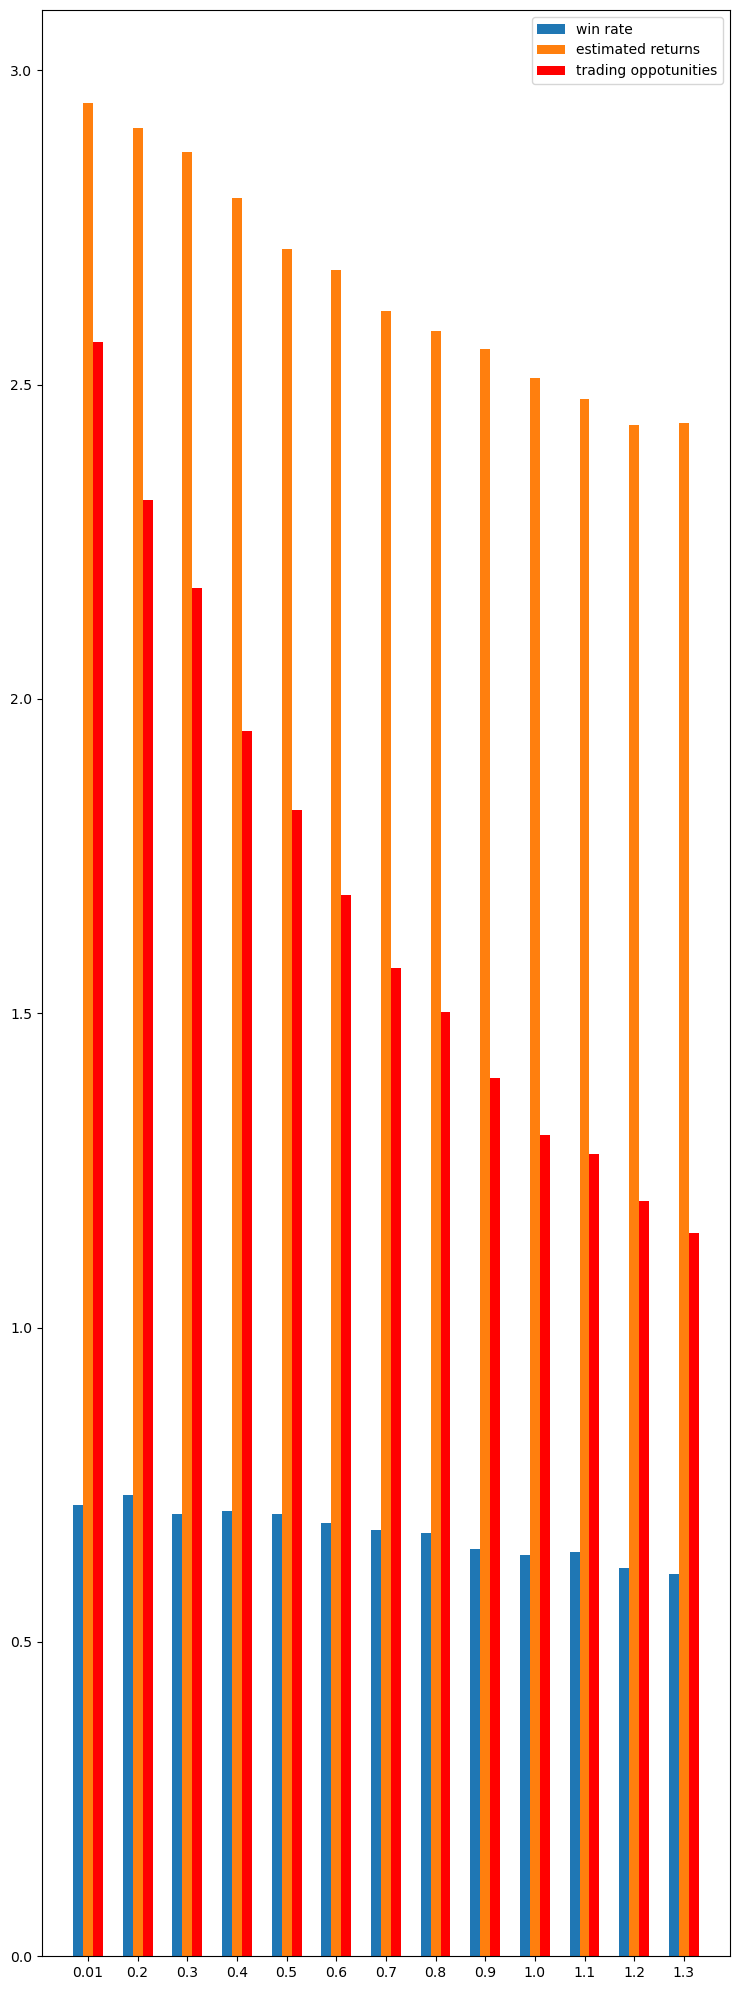

In [136]:
x_threshod = []
y_winrate_threshod = []
y_estimated_returns_threshod = []
y_trading_oppotunities_threshod = []

for z_score_threshod in z_score_threshod_list:
    x_threshod.append(f"{z_score_threshod}")
    y_winrate_threshod.append(experiment_different_threshod_calculation[experiment_different_threshod_calculation[f"threshod_{z_score_threshod}_estimated_return"] > 0].shape[0] / experiment_different_threshod_calculation.shape[0])
    y_estimated_returns_threshod.append(experiment_different_threshod_calculation[f"threshod_{z_score_threshod}_estimated_return"].mean())
    y_trading_oppotunities_threshod.append(experiment_different_threshod_calculation[f"threshod_{z_score_threshod}_trading_oppotunities"].mean())

width = 0.2


position = np.arange(len(x_threshod))

plt.subplot()
plt.bar(position - width, y_winrate_threshod, width=width, label = "win rate")
plt.bar(position, y_estimated_returns_threshod, width=width, label = "estimated returns")
plt.bar(position + width, y_trading_oppotunities_threshod, color = "r", width=width, label = "trading oppotunities")

plt.xticks(position, x_threshod)

plt.legend()
ax.set_title("Win rate, estimated_returns and trading_oppotunities \n for different z-score threshod")

plt.show()

## Answer to Q4:
#### [0.2, 0.5] is the best range from the graph. For the sake of safety and my intuition, I'd choose ***0.8***.

### 

# Q5: What is the best trainning period? (200, 250, 300, 350, 400, 450, 499)
# Q6: What is the best trading intervals? (10m, 15m, 30m, 60m, 120m)
#### parameters: z-score window: 46, z-score threshod:0.8
#### critical factors: total win rate, average_returns_every_24h(total), average_trading_oppotunities_every_24h(total)


In [137]:
# first loop through intervals
# then get the trainning period
import time
test_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h"]


test_price_history_dict = []

for test_interval in test_intervals:
    counts = 0
    price_history_dict = {}
    for sym in tradeable_symbols:
        price_history = binance_get_recent_close_price(sym, interval=test_interval, limit=num_interval_limit)
        if len(price_history) == num_interval_limit: # make sure that each symbol has the same amount of data
            price_history_dict[sym] = price_history
            counts += 1
    
    test_price_history_dict.append(price_history_dict)
    logger.info (f"{counts} items stored, {len(tradeable_symbols)-counts}items not stored")
    time.sleep(5)
    

2023-07-13 18:19:18,261 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:19:37,049 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:19:51,757 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:20:06,717 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:20:20,251 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:20:34,460 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:20:48,618 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:21:05,904 - Rovers_3.0 - INFO - 48 items stored, 0items not stored
2023-07-13 18:21:22,482 - Rovers_3.0 - INFO - 48 items stored, 0items not stored


In [138]:
for index, i in enumerate(test_intervals):
    filename = f"{i}_experiment_price_list.json"
    with open(filename, "w") as fp:
        json.dump(test_price_history_dict[index], fp, indent=4)
    logger.info(f"Prices saved successfully for {test_intervals[index]}.")


2023-07-13 18:21:27,538 - Rovers_3.0 - INFO - Prices saved successfully for 1m.


2023-07-13 18:21:27,563 - Rovers_3.0 - INFO - Prices saved successfully for 3m.
2023-07-13 18:21:27,583 - Rovers_3.0 - INFO - Prices saved successfully for 5m.
2023-07-13 18:21:27,601 - Rovers_3.0 - INFO - Prices saved successfully for 15m.
2023-07-13 18:21:27,618 - Rovers_3.0 - INFO - Prices saved successfully for 30m.
2023-07-13 18:21:27,635 - Rovers_3.0 - INFO - Prices saved successfully for 1h.
2023-07-13 18:21:27,653 - Rovers_3.0 - INFO - Prices saved successfully for 2h.
2023-07-13 18:21:27,670 - Rovers_3.0 - INFO - Prices saved successfully for 4h.
2023-07-13 18:21:27,687 - Rovers_3.0 - INFO - Prices saved successfully for 6h.


In [139]:
def get_profitable_cointegrated_pairs_test_trainning_period(prices, trainning_period,  trigger_z_score_threshod = 0.8) -> str:
    # Loop through coins and check for co-integration
    coint_pair_list = []

    loop_count = 0
    for sym_1 in tradeable_symbols:
        loop_count += 1
        # Check each coin against the first (sym_1)
        for sym_2 in tradeable_symbols[loop_count:]:
            
            # Get close prices
            series_1_trainning = prices[sym_1][999 - 100 - trainning_period - 26:(999-100)]
            series_2_trainning = prices[sym_2][999 - 100 - trainning_period - 26:(999-100)]
            
            series_1_next_100 = prices[sym_1][899:]
            series_2_next_100 = prices[sym_2][899:]

            # Check for cointegration and add cointegrated pair
            coint_flag, p_value, hedge_ratio, initial_intercept = calculate_cointegration_static(series_1_trainning, series_2_trainning)

            if coint_flag == 1:
                
                trading_oppotunities_trainning, estimated_return_trainning = calculate_trading_estimated_oppotunities_return(series_1_trainning, series_2_trainning, hedge_ratio ,initial_intercept,
                                                                                                 trigger_z_score_threshod, func_z_score=calculate_zscore_window, num_window=26)

                trading_oppotunities_next_100, estimated_return_next_100 = calculate_trading_estimated_oppotunities_return(series_1_next_100, series_2_next_100, hedge_ratio ,initial_intercept,
                                                                                                 trigger_z_score_threshod, func_z_score=calculate_zscore_window, num_window=26)

                
                coint_pair_list.append({
                    "sym_1": sym_1,
                    "sym_2": sym_2,
                    "hedge_ratio": hedge_ratio,
                    "initial_intercept": initial_intercept,
                    "trading_oppotunities_trainning": trading_oppotunities_trainning,
                    "estimated_returns_trainning": estimated_return_trainning,
                    "trading_oppotunities_next_100": trading_oppotunities_next_100,
                    "estimated_returns_next_100": estimated_return_next_100,
                })

    # Output results and rank all the trading pairs
    df_coint = pd.DataFrame(coint_pair_list)
    # add the total score column
    df_coint = df_coint[df_coint["estimated_returns_trainning"] > 0]
    df_coint = df_coint.sort_values("estimated_returns_trainning", ascending=False)
    
    return df_coint

# test
get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[3], 200)

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_trainning,estimated_returns_trainning,trading_oppotunities_next_100,estimated_returns_next_100
106,WAVESUSDT,GALAUSDT,-95.889646,4.485232,7,28920.679298,2,-38.252114
99,WAVESUSDT,AAVEUSDT,-0.026841,4.073631,9,640.248822,2,1896.988908
97,WAVESUSDT,FTMUSDT,-6.638867,3.940020,7,210.436362,3,140.821986
171,MTLUSDT,1000SHIBUSDT,-178.773982,2.854999,7,135.888352,2,50.879679
153,STORJUSDT,AAVEUSDT,-0.003055,0.551774,8,96.684220,1,26.291773
...,...,...,...,...,...,...,...,...
76,ATOMUSDT,XEMUSDT,-8.620266,9.508591,5,1.104903,1,0.797051
49,LINKUSDT,OPUSDT,2.861867,2.711649,6,1.073590,4,-0.954022
12,ETHUSDT,NEARUSDT,664.532978,993.587432,8,0.880361,2,0.847578
87,DOGEUSDT,NEARUSDT,0.021450,0.036556,5,0.583690,5,2.543660


In [140]:
def profitable_cointegrated_pairs_test_intervals_trainning_period_result(interval, trainning_period, data: pd.DataFrame):
    logger.info(f"Deriving data for{interval}_{trainning_period}")
    ave_trading_oppotunities_next_100 = data["trading_oppotunities_next_100"].mean()
    ave_returns_next_100 = data["estimated_returns_next_100"].mean()
    win_rate_next_100 = data[data["estimated_returns_next_100"] > 0].shape[0] /data.shape[0]
    return {f"{interval}_{trainning_period}": [ave_trading_oppotunities_next_100, ave_returns_next_100, win_rate_next_100]}

# test
# data_1 = profitable_cointegrated_pairs_test_intervals_trainning_period_result("1m",200,get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[1], 400))
# data_2 = profitable_cointegrated_pairs_test_intervals_trainning_period_result("1h",200,get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[2], 400))
# data_4 = profitable_cointegrated_pairs_test_intervals_trainning_period_result("30m",200,get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[3], 400))
# data_3 = profitable_cointegrated_pairs_test_intervals_trainning_period_result("6h",200,get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[4], 400))

# data_1, data_2, data_3, data_4
# test_intervals

In [141]:
# next, loop through trainning period, compare the results in recent 100 intervals
test_trainning_period = [200, 250, 300, 350, 400, 450, 499]
test_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h"]

result_list = []
for index, interval in enumerate(test_intervals):
    for period in test_trainning_period:
        data = get_profitable_cointegrated_pairs_test_trainning_period(test_price_history_dict[index], period)
        result_list.append(profitable_cointegrated_pairs_test_intervals_trainning_period_result(interval, period, data))

result_list

2023-07-13 18:21:34,114 - Rovers_3.0 - INFO - Deriving data for1m_200
2023-07-13 18:21:37,780 - Rovers_3.0 - INFO - Deriving data for1m_250
2023-07-13 18:21:42,051 - Rovers_3.0 - INFO - Deriving data for1m_300
2023-07-13 18:21:46,599 - Rovers_3.0 - INFO - Deriving data for1m_350
2023-07-13 18:21:51,908 - Rovers_3.0 - INFO - Deriving data for1m_400
2023-07-13 18:21:58,879 - Rovers_3.0 - INFO - Deriving data for1m_450
2023-07-13 18:22:21,482 - Rovers_3.0 - INFO - Deriving data for1m_499
2023-07-13 18:22:24,828 - Rovers_3.0 - INFO - Deriving data for3m_200
2023-07-13 18:22:28,781 - Rovers_3.0 - INFO - Deriving data for3m_250
2023-07-13 18:22:33,110 - Rovers_3.0 - INFO - Deriving data for3m_300
2023-07-13 18:22:37,955 - Rovers_3.0 - INFO - Deriving data for3m_350
2023-07-13 18:22:43,485 - Rovers_3.0 - INFO - Deriving data for3m_400
2023-07-13 18:22:56,537 - Rovers_3.0 - INFO - Deriving data for3m_450
2023-07-13 18:23:10,318 - Rovers_3.0 - INFO - Deriving data for3m_499
2023-07-13 18:23:13,

[{'1m_200': [2.672727272727273, 0.184003374860467, 0.7090909090909091]},
 {'1m_250': [2.725806451612903, -0.0021460002983951037, 0.5967741935483871]},
 {'1m_300': [2.769230769230769, -0.1100468612421354, 0.6153846153846154]},
 {'1m_350': [2.8260869565217392, 0.001829443840462445, 0.5652173913043478]},
 {'1m_400': [2.843137254901961, 0.2015681190345338, 0.6274509803921569]},
 {'1m_450': [2.7794117647058822, 0.1722115784952943, 0.6470588235294118]},
 {'1m_499': [2.918032786885246, 0.2983082601261931, 0.6065573770491803]},
 {'3m_200': [2.345679012345679, -0.534193756486413, 0.48148148148148145]},
 {'3m_250': [1.953125, -1.3420917320314176, 0.390625]},
 {'3m_300': [2.380952380952381, 0.37449027190736967, 0.75]},
 {'3m_350': [1.8021978021978022, -0.8340556873504203, 0.38461538461538464]},
 {'3m_400': [1.5393258426966292, -1.0319439160542638, 0.25842696629213485]},
 {'3m_450': [1.5813953488372092, -0.9643120636342557, 0.3488372093023256]},
 {'3m_499': [1.6770833333333333, -0.947005889253005,

In [142]:
with open("profitable_cointegrated_pairs_test_intervals_trainning_period_result", "w") as fp:
        json.dump(result_list, fp, indent=4)

In [143]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [144]:
list(result_list[0].values())[0]

[2.672727272727273, 0.184003374860467, 0.7090909090909091]

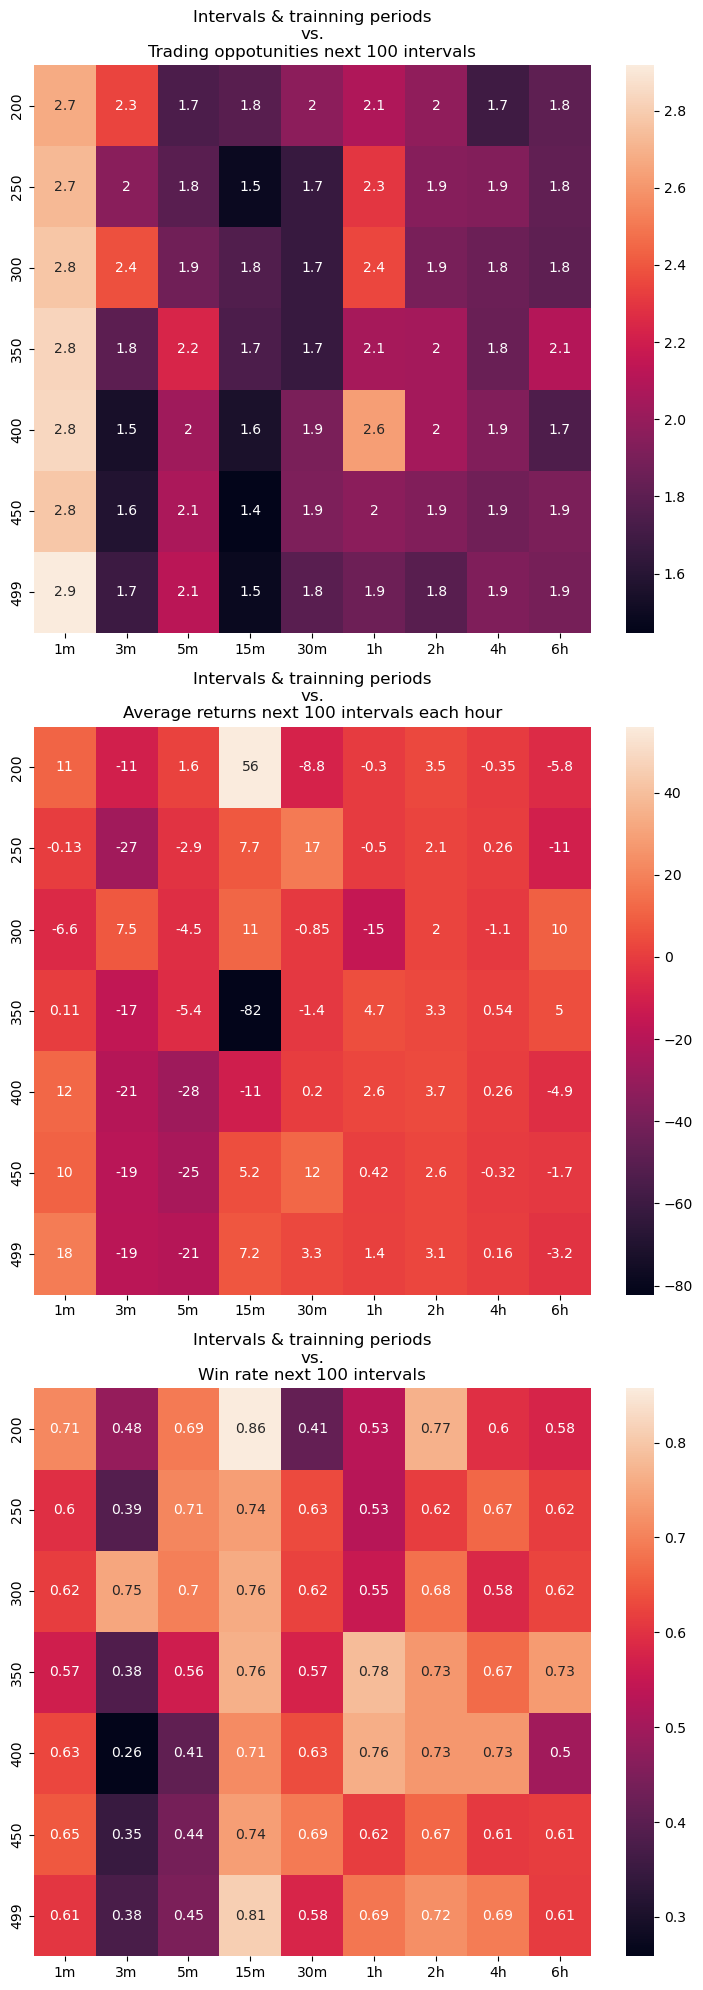

In [145]:
# heatmap for trading oppotunities
import seaborn as sn

test_trainning_period = [200, 250, 300, 350, 400, 450, 499]
test_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h"]
to_hour_coeficient = [60, 20, 12, 4, 2, 1, 1/2, 1/4, 1/6]

# f"{interval}_{trainning_period}": [ave_trading_oppotunities_next_100, ave_returns_next_100, win_rate_next_100]}
def turn_result_list_to_pd(parameter: int, result_list = result_list):
    pd_result = pd.DataFrame()
    target_list = []
    for index, interval in enumerate(test_intervals):
        for i, period in  enumerate(test_trainning_period):
            if parameter == 1:
                target_list.append(list(result_list[i + index * len(test_trainning_period)].values())[0][parameter] * to_hour_coeficient[index])
            else:
                target_list.append(list(result_list[i + index * len(test_trainning_period)].values())[0][parameter])
        pd_result[f"{interval}"] = target_list
        target_list = []
    return pd_result

plt.rcParams["figure.figsize"] = [7.5, 20]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3,1)


fig.subplots_adjust(wspace=0.01)

# trading oppotunities
pd_ave_trading_oppotunities_next_100 = turn_result_list_to_pd(0, result_list)
pd_ave_trading_oppotunities_next_100.index = test_trainning_period

# average returns
pd_ave_returns_next_100_each_hr = turn_result_list_to_pd(1, result_list)
pd_ave_returns_next_100_each_hr.index = test_trainning_period

# winrate
win_rate_next_100 = turn_result_list_to_pd(2, result_list)
win_rate_next_100.index = test_trainning_period

#heatmap
hm_pd_ave_trading_oppotunities_next_100 = (sn.heatmap(data=pd_ave_trading_oppotunities_next_100, annot=True, ax=ax1))
hm_pd_ave_returns_next_100_each_hr = sn.heatmap(data=pd_ave_returns_next_100_each_hr, annot=True,ax=ax2)
hm_win_rate_next_100 = sn.heatmap(data=win_rate_next_100, annot=True,ax=ax3)

hm_pd_ave_trading_oppotunities_next_100.set_title("Intervals & trainning periods\nvs.\nTrading oppotunities next 100 intervals")
hm_pd_ave_returns_next_100_each_hr.set_title("Intervals & trainning periods\nvs.\nAverage returns next 100 intervals each hour")
hm_win_rate_next_100.set_title("Intervals & trainning periods\nvs.\nWin rate next 100 intervals")

plt.show()

### Summary
I just want to be short so that I can go to sleep:
- Taking the features shown in the three heatmaps above, we can observe that the sweet spot located in the place where interval should be [5m, 15m], and the trainning period should be [350 400]

## Answer to Q5 and Q6:
#### 1. Pick the trainning period of 350
#### 2. Pick the intervals of 15m

## **Conclusions:**
#### Choosing trading symbols:
- 1. The feature of cointegration has a strong trend to persist after 100 intervals of the trainning period
- 2. Pick the trading pair with large number of trading oppotunities during trainning period
- 3. The trading pair being selected ***must*** be profitable during trainning period
- 4. Use the investable_value/(price_1 + price_2 * hedge_ratio) to denote the possible revenue

#### Parameters
- z-score window: 26
- a-score threshod: 0.8
- trainning period: 350
- interval: 15m





## Kelly Criterion

In [146]:
def calculate_kelly_criterion_parameters(series_1, series_2, hedge_ratio: float, 
                                        threshod = 0.8, trading_times_threshod = 5, investable_capital_each_time = 100, estimated_trading_fee_rate = 0.0004,
                                        num_window = 26):
    enter_market_signal = False
    spread = calculate_spread_static(series_1, series_2, hedge_ratio)
    
    zscore_series = calculate_zscore_window(spread, num_window)
    
    trade_oppotunities = 0
    last_value = 0.01
    
    cumulative_return = 0
    cumulative_trading_qty = 0
    count_entering_time = 0
    
    open_long_price_list = []
    open_short_price_list = []
    
    win_list = []
    lose_list = []
    
    for index, value in enumerate(zscore_series):
        if abs(value) >= abs(threshod) and not check_differnet_signal(value, last_value):
            enter_market_signal = True
            
            if value >= threshod:
                direction = "sell"
            elif value <= -threshod:
                direction = "buy"
            
            if count_entering_time < trading_times_threshod:
                cumulative_trading_qty += (investable_capital_each_time / (series_1[index] + hedge_ratio * series_2[index]))  # qty for symbol 1
                if direction == "buy":
                    open_long_price_list.append(series_1[index])
                    open_short_price_list.append(series_2[index])
                elif direction == "sell":
                    open_short_price_list.append(series_1[index])
                    open_long_price_list.append(series_2[index])
                    
                count_entering_time += 1
                
        elif enter_market_signal and check_differnet_signal(value, last_value):
            trade_oppotunities += 1
            
            # calculate the exiting_revenue of the symbols
            if direction == "buy":
                buy_side_profit = (series_1[index] - sum(open_long_price_list)/len(open_long_price_list)) * cumulative_trading_qty
                sell_side_profit = (sum(open_short_price_list)/len(open_short_price_list) - series_2[index]) * cumulative_trading_qty * hedge_ratio 
            elif direction == "sell":
                buy_side_profit = (series_2[index] - sum(open_long_price_list)/len(open_long_price_list)) * cumulative_trading_qty * hedge_ratio
                sell_side_profit = (sum(open_short_price_list)/len(open_short_price_list) - series_1[index]) * cumulative_trading_qty
                
            exiting_profit = buy_side_profit + sell_side_profit - investable_capital_each_time * count_entering_time * estimated_trading_fee_rate # revenue for all symbols
            
            if exiting_profit > 0:
                win_list.append(exiting_profit)
            else:
                lose_list.append(exiting_profit)

            
            # Cumulate the return
            cumulative_return += exiting_profit
            
            # Reset
            enter_market_signal = False
            cumulative_trading_qty = 0
            count_entering_time = 0
            direction = ""
            open_long_price_list = []
            open_short_price_list = []
            
        last_value = value
    
    
    if len(win_list) == 0:
        average_win_each_time = 0
    else: average_win_each_time = sum(win_list) / len(win_list)
    
    if len(lose_list) == 0:
        average_lose_each_time = 0
    else: average_lose_each_time = sum(lose_list) / len(lose_list)

        
    return average_win_each_time, average_lose_each_time

In [147]:
import statistics
def get_profitable_cointegrated_pairs_test_trainning_period_kelly(prices, trainning_period,  trigger_z_score_threshod = 0.8) -> str:
    # Loop through coins and check for co-integration
    coint_pair_list = []

    loop_count = 0
    for sym_1 in tradeable_symbols:
        loop_count += 1
        # Check each coin against the first (sym_1)
        for sym_2 in tradeable_symbols[loop_count:]:
            
            # Get close prices
            series_1_trainning = prices[sym_1][999 - 100 - trainning_period - 26:(999-100)]
            series_2_trainning = prices[sym_2][999 - 100 - trainning_period - 26:(999-100)]
            
            series_1_next_100 = prices[sym_1][899:]
            series_2_next_100 = prices[sym_2][899:]

            # Check for cointegration and add cointegrated pair
            coint_flag, p_value, hedge_ratio, initial_intercept = calculate_cointegration_static(series_1_trainning, series_2_trainning)

            if coint_flag == 1:
                
                trading_oppotunities_trainning, estimated_return_trainning = calculate_trading_estimated_oppotunities_return(series_1_trainning, series_2_trainning, hedge_ratio ,initial_intercept,
                                                                                                 trigger_z_score_threshod, func_z_score=calculate_zscore_window, num_window=26)

                trading_oppotunities_next_100, estimated_return_next_100 = calculate_trading_estimated_oppotunities_return(series_1_next_100, series_2_next_100, hedge_ratio ,initial_intercept,
                                                                                                 trigger_z_score_threshod, func_z_score=calculate_zscore_window, num_window=26)
                
                win_money_each_time, lose_money_each_time = calculate_kelly_criterion_parameters(series_1_next_100, series_2_next_100, hedge_ratio)
                
                spread_std = statistics.pstdev(calculate_spread_static(series_1_next_100, series_2_next_100, hedge_ratio))
                spread_std_trainning = statistics.pstdev(calculate_spread_static(series_1_trainning, series_2_trainning, hedge_ratio))

                
                coint_pair_list.append({
                    "sym_1": sym_1,
                    "sym_2": sym_2,
                    "hedge_ratio": hedge_ratio,
                    "initial_intercept": initial_intercept,
                    "trading_oppotunities_trainning": trading_oppotunities_trainning,
                    "estimated_returns_trainning": estimated_return_trainning,
                    "spread_std_trainning": spread_std_trainning,
                    "trading_oppotunities_next_100": trading_oppotunities_next_100,
                    "estimated_returns_next_100": estimated_return_next_100,
                    "spread_std": spread_std,
                    "win_money_each_time": win_money_each_time,
                    "lose_money_each_time": lose_money_each_time,
                })

    # Output results and rank all the trading pairs
    df_coint = pd.DataFrame(coint_pair_list)
    # add the total score column
    df_coint = df_coint[df_coint["estimated_returns_trainning"] > 0]
    df_coint = df_coint.sort_values("estimated_returns_trainning", ascending=False)
    
    return df_coint

In [148]:
trainning_periods = [350, 400]

with open ("15m_experiment_price_list.json") as json_file:
    price_data = json.load(json_file)
    df_result_350 = get_profitable_cointegrated_pairs_test_trainning_period_kelly(price_data, 350)
    df_result_400 = get_profitable_cointegrated_pairs_test_trainning_period_kelly(price_data, 400)

In [149]:
df_result_remove_extreme = df_result_350.drop([38])
df_result_remove_extreme

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_trainning,estimated_returns_trainning,spread_std_trainning,trading_oppotunities_next_100,estimated_returns_next_100,spread_std,win_money_each_time,lose_money_each_time
51,1000XECUSDT,GALAUSDT,-1.281136,0.065051,10,556.228218,0.000827,1,53.036000,0.000726,53.036000,0.000000
32,WAVESUSDT,GMTUSDT,-9.059605,4.066015,10,549.110849,0.058086,2,-1366.802549,0.046227,0.000000,-683.401274
53,1000XECUSDT,OPUSDT,-0.025612,0.064874,12,419.037944,0.000900,1,49.704155,0.000717,49.704155,0.000000
30,WAVESUSDT,AAVEUSDT,-0.023183,3.799879,13,316.663297,0.052215,3,113.637369,0.031732,37.879123,0.000000
52,1000XECUSDT,GMTUSDT,-0.094700,0.054222,13,98.504381,0.000918,1,33.380291,0.000512,33.380291,0.000000
23,BNBUSDT,OCEANUSDT,-467.920172,414.868895,10,63.769489,3.070938,1,7.194746,2.239602,7.194746,0.000000
35,STORJUSDT,XEMUSDT,-2.608098,0.409105,10,34.266824,0.005448,2,3.247202,0.005744,1.623601,0.000000
45,1000SHIBUSDT,CTSIUSDT,-0.000629,0.007668,12,21.936128,0.000089,2,2.577681,0.000036,1.288841,0.000000
46,1000SHIBUSDT,GMTUSDT,0.000634,0.007433,12,21.762913,0.000089,2,1.909448,0.000037,0.954724,0.000000
34,MKRUSDT,MTLUSDT,-168.088135,1177.396833,10,18.476242,14.759908,2,8.353593,13.980721,4.176796,0.000000


In [150]:
win_each_350 = df_result_remove_extreme["win_money_each_time"].mean()
lose_each_350 = df_result_remove_extreme["lose_money_each_time"].mean()

In [151]:
kelly_350 = 0.77 - abs((0.23)*(lose_each_350 / win_each_350))
kelly_350

0.0409538481296251

In [152]:
win_each_400 = df_result_400["win_money_each_time"].mean()
lose_each_400 = df_result_400["lose_money_each_time"].mean()
win_each_400, lose_each_400

(2.0190806478326535, -2.725588568468542)

In [153]:
kelly_400 = 0.89 - abs((0.11)*(lose_each_400 / win_each_400))
kelly_400

0.7415092783176489

In [161]:
median = df_result_400["estimated_returns_trainning"].median()
median

7.755307835040315

In [162]:
result_sort_reference = df_result_400.sort_values("estimated_returns_next_100", ascending=False).head(10)
result_sort_reference

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_trainning,estimated_returns_trainning,spread_std_trainning,trading_oppotunities_next_100,estimated_returns_next_100,spread_std,win_money_each_time,lose_money_each_time
34,WAVESUSDT,SOLUSDT,-0.083481,3.911246,14,505.086669,0.069590,1,38.921128,0.044607,38.921128,0.0
50,OCEANUSDT,MTLUSDT,-0.144053,0.583156,13,148.750221,0.006002,1,14.537736,0.004535,14.537736,0.0
40,MKRUSDT,MTLUSDT,-193.637463,1216.590757,12,31.476365,15.617589,2,9.185287,14.458112,4.592644,0.0
24,BNBUSDT,OCEANUSDT,-466.970111,414.304522,11,76.400317,3.066342,1,7.150157,2.237647,7.150157,0.0
13,XRPUSDT,OCEANUSDT,-0.231774,0.557449,15,14.139714,0.002379,4,5.507392,0.001656,1.376848,0.0
38,WAVESUSDT,APEUSDT,-0.607637,3.288336,11,72.886959,0.074238,1,4.220757,0.038506,4.220757,0.0
53,1INCHUSDT,XEMUSDT,3.233726,0.215512,13,13.776317,0.002690,2,3.296476,0.005246,1.648238,0.0
19,LINKUSDT,SOLUSDT,0.078186,4.477809,14,3.173256,0.033108,1,3.101334,0.045354,3.101334,0.0
4,BTCUSDT,MATICUSDT,5597.359962,26384.153609,11,9.691517,89.334507,2,3.017830,125.480139,1.508915,0.0
14,XRPUSDT,MTLUSDT,0.047729,0.401371,16,8.914710,0.001794,5,2.904155,0.000975,0.580831,0.0


In [165]:
result_sort_1 = df_result_400[df_result_400["estimated_returns_trainning"] <= 10 * median]
result_sort_1

,sym_1,sym_2,hedge_ratio,initial_intercept,trading_oppotunities_trainning,estimated_returns_trainning,spread_std_trainning,trading_oppotunities_next_100,estimated_returns_next_100,spread_std,win_money_each_time,lose_money_each_time
24,BNBUSDT,OCEANUSDT,-466.970111,414.304522,11,76.400317,3.066342,1,7.150157,2.237647,7.150157,0.000000
38,WAVESUSDT,APEUSDT,-0.607637,3.288336,11,72.886959,0.074238,1,4.220757,0.038506,4.220757,0.000000
40,MKRUSDT,MTLUSDT,-193.637463,1216.590757,12,31.476365,15.617589,2,9.185287,14.458112,4.592644,0.000000
13,XRPUSDT,OCEANUSDT,-0.231774,0.557449,15,14.139714,0.002379,4,5.507392,0.001656,1.376848,0.000000
53,1INCHUSDT,XEMUSDT,3.233726,0.215512,13,13.776317,0.002690,2,3.296476,0.005246,1.648238,0.000000
5,BTCUSDT,OCEANUSDT,-11088.667391,34467.786974,12,12.276148,132.988178,1,0.501357,169.465319,0.501357,0.000000
28,DOGEUSDT,WAVESUSDT,-0.001971,0.069355,14,11.846665,0.000410,2,2.572624,0.000324,1.286312,0.000000
54,LINAUSDT,GALAUSDT,0.822415,-0.006434,16,10.939422,0.000225,2,-0.530881,0.000110,0.638445,-1.169327
16,EOSUSDT,LINKUSDT,0.155713,-0.235232,15,10.786685,0.005993,1,0.614591,0.007828,0.614591,0.000000
46,NEARUSDT,MASKUSDT,0.414679,-0.074523,15,9.837959,0.010549,2,1.955871,0.026083,0.977935,0.000000


#### Choose the best trading pair with the greatest estimated returns in the trainning period whose returns is less than 10 * median